In [3]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
# import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [4]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [5]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [6]:
# num_classes = dataset.num_classes
# num_classes

In [7]:
#Loading the dataset

names = [
    datasets.LionData,
    datasets.SealIDSegmented,
    datasets.SeaStarReID2023,
    datasets.StripeSpotter,
    datasets.CTai,
    datasets.CZoo,
    datasets.NDD20v2
]

In [8]:
l = [
 'datasets.LionData',
 'datasets.SealIDSegmented',
 'datasets.SeaStarReID2023',
 'datasets.StripeSpotter',
 'datasets.CTai',
 'datasets.CZoo',
 'datasets.NDD20v2']

In [9]:
roots = ['data/' + str(dataset).split('.')[1] for dataset in l]
roots

['data/LionData',
 'data/SealIDSegmented',
 'data/SeaStarReID2023',
 'data/StripeSpotter',
 'data/CTai',
 'data/CZoo',
 'data/NDD20v2']

data/NDD20v2


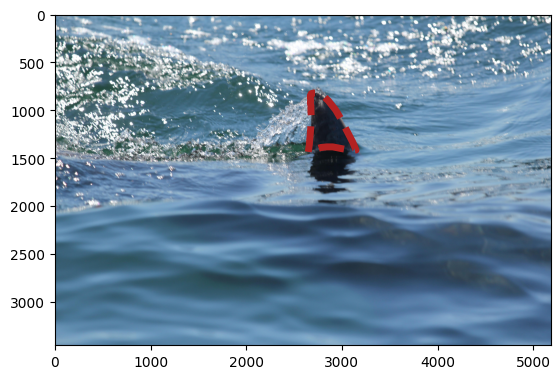

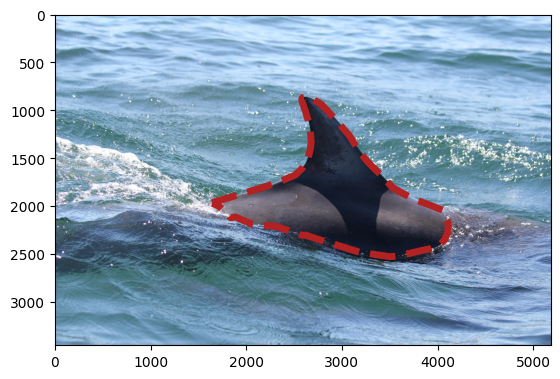

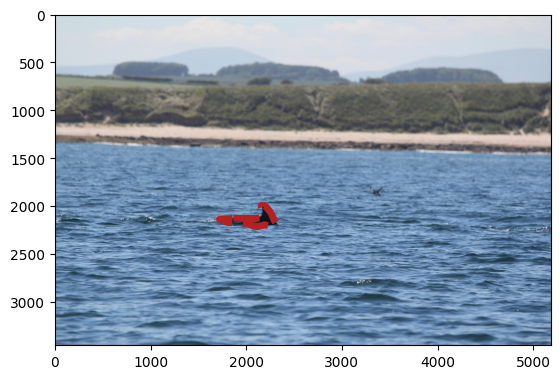

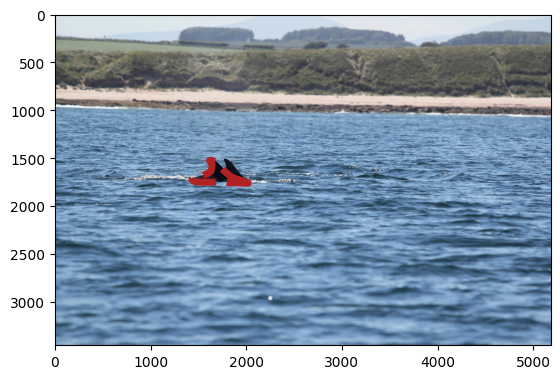

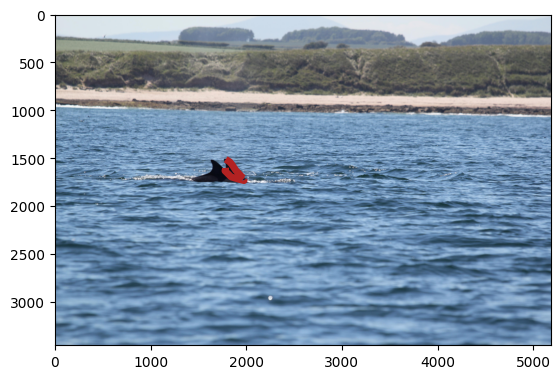

In [10]:
from wildlife_datasets.analysis import display_statistics, plot_bbox_segmentation, plot_grid
from wildlife_datasets.splits import visualize_split

root = roots[6]
print(root)
m = names[6](root)
print(m)
df = m.df
plot_bbox_segmentation(df, root, 5)

In [11]:
df

,image_id,identity,path,orientation,segmentation,species,out_of_focus
0,0,unknown,ABOVE\104.jpg,above,"[2648.0, 1434.0, 2659.0, 1360.0, 2673.0, 1200....",BND,NaN
1,1,unknown,ABOVE\1841.jpg,above,"[1641.0, 1966.0, 1834.0, 1908.0, 2181.0, 1803....",BND,NaN
2,2,unknown,ABOVE\2118.jpg,above,"[1869.0, 2128.0, 2095.0, 2131.0, 2139.0, 2123....",BND,NaN
3,3,unknown,ABOVE\1042.jpg,above,"[1979.0, 1743.0, 1847.0, 1699.0, 1773.0, 1638....",BND,NaN
4,4,unknown,ABOVE\1042.jpg,above,"[1966.0, 1707.0, 1891.0, 1627.0, 1850.0, 1566....",BND,NaN
...,...,...,...,...,...,...,...
6097,6097,25,BELOW\1789.jpg,below,"[453.0, 628.0, 520.0, 585.0, 552.0, 571.0, 569...",WBD,False
6098,6098,70,BELOW\810.jpg,below,"[338.0, 407.0, 369.0, 428.0, 398.0, 419.0, 430...",WBD,False
6099,6099,70,BELOW\1555.jpg,below,"[545.0, 371.0, 601.0, 400.0, 626.0, 401.0, 644...",WBD,False
6100,6100,70,BELOW\1266.jpg,below,"[775.0, 533.0, 778.0, 523.0, 783.0, 514.0, 801...",WBD,False


Number of identitites            83
Number of all animals            6102
Number of animals with one image 0
Number of unidentified animals   0


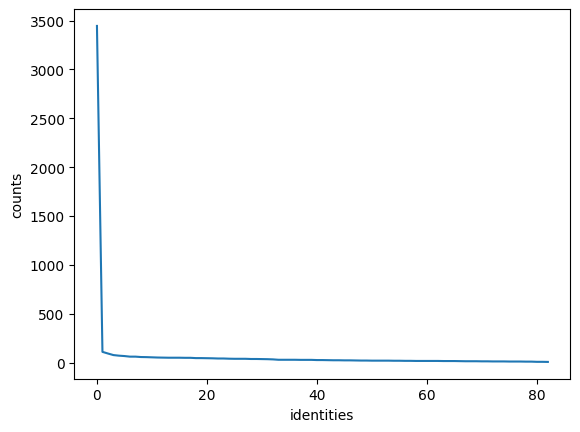

In [12]:
display_statistics(df)

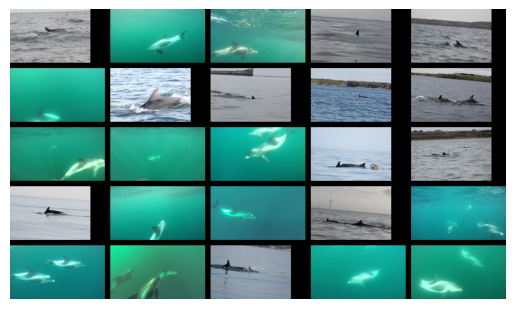

In [13]:
m.plot_grid(n_cols=5);

In [14]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'orientation', 'segmentation',
       'species', 'out_of_focus'],
      dtype='object')


In [15]:
unique_categories = df['identity'].unique()
print(unique_categories)

['unknown' '13' '40' '9' '15' '29' '2' '42' '19' '36' '44' '3' '32' '39'
 '37' '33' '26' '14' '4' '1' '22' '11' '16' '28' '8' '34' '30' '25' '12'
 '17' '7' '6' '38' '21' '24' '18' '10' '31' '41' '20' '23' '43' '27' '5'
 '35' '50' '61' '74' '55' '71' '80' '78' '67' '82' '66' '64' '62' '49'
 '47' '76' '51' '68' '75' '46' '77' '81' '73' '57' '60' '79' '52' '72'
 '54' '58' '53' '63' '59' '45' '48' '56' '70' '69' '65']


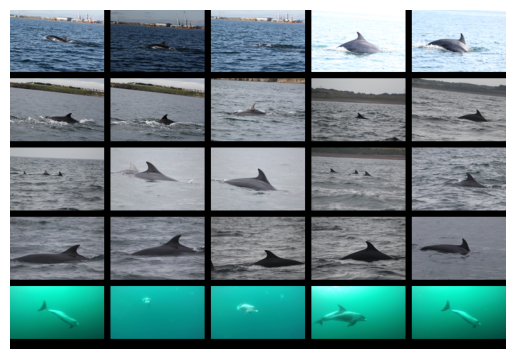

In [16]:
m.plot_grid(n_cols=5, idx=df['identity']=='9');

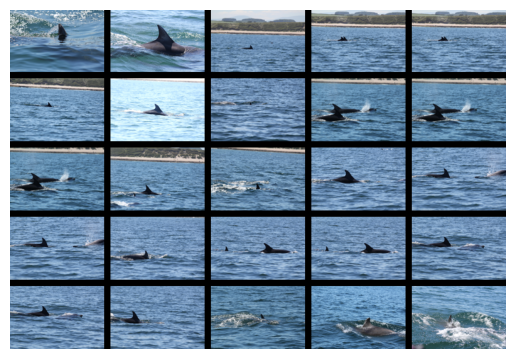

In [17]:
m.plot_grid(n_cols=5, idx=df['species']=='BND');

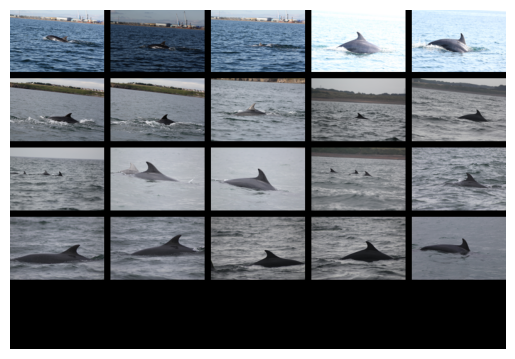

In [18]:
m.plot_grid(n_cols=5, idx=(df['species']=='BND')*(df['identity']=='9'));

In [19]:
print(m)

In [20]:
df

,image_id,identity,path,orientation,segmentation,species,out_of_focus
0,0,unknown,ABOVE\104.jpg,above,"[2648.0, 1434.0, 2659.0, 1360.0, 2673.0, 1200....",BND,NaN
1,1,unknown,ABOVE\1841.jpg,above,"[1641.0, 1966.0, 1834.0, 1908.0, 2181.0, 1803....",BND,NaN
2,2,unknown,ABOVE\2118.jpg,above,"[1869.0, 2128.0, 2095.0, 2131.0, 2139.0, 2123....",BND,NaN
3,3,unknown,ABOVE\1042.jpg,above,"[1979.0, 1743.0, 1847.0, 1699.0, 1773.0, 1638....",BND,NaN
4,4,unknown,ABOVE\1042.jpg,above,"[1966.0, 1707.0, 1891.0, 1627.0, 1850.0, 1566....",BND,NaN
...,...,...,...,...,...,...,...
6097,6097,25,BELOW\1789.jpg,below,"[453.0, 628.0, 520.0, 585.0, 552.0, 571.0, 569...",WBD,False
6098,6098,70,BELOW\810.jpg,below,"[338.0, 407.0, 369.0, 428.0, 398.0, 419.0, 430...",WBD,False
6099,6099,70,BELOW\1555.jpg,below,"[545.0, 371.0, 601.0, 400.0, 626.0, 401.0, 644...",WBD,False
6100,6100,70,BELOW\1266.jpg,below,"[775.0, 533.0, 778.0, 523.0, 783.0, 514.0, 801...",WBD,False


In [21]:
df['path'][0]

'ABOVE\\104.jpg'

In [22]:
dataset_path_prefix = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\NDD20v2\\'
df['path'] = df['path'].apply(lambda x: os.path.join(dataset_path_prefix, x))

df['path'][0]

'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\NDD20v2\\ABOVE\\104.jpg'

Number of images: 6102
Number of unique labels: 83


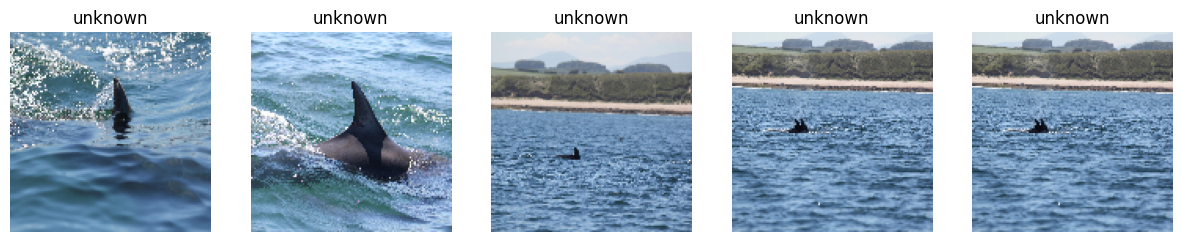

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 3: Load images and labels
def load_images_from_dataframe(dataframe, target_size=(256, 256)):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        file_path = row['path']
        image = cv2.imread(file_path)
        if image is not None:
            # Resize image to target size
            resized_image = cv2.resize(image, target_size)
            images.append(resized_image)
            labels.append(row['identity'])
    return images, labels

# Modify target_size as needed, e.g., (128, 128) for smaller images
target_size = (128, 128)
images, labels = load_images_from_dataframe(df, target_size=target_size)

# Print the count of images and unique labels
print(f"Number of images: {len(images)}")
print(f"Number of unique labels: {len(set(labels))}")

# Plot a sample of images with their corresponding labels
num_samples = min(5, len(images))
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i].set_title(labels[i])
    axes[i].axis('off')
plt.show()


In [24]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [25]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [26]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.65
